In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data=pd.read_csv(r"F:\playing\liver_cancer_prediction.csv")
print("data shape : ",data.shape)
data.head()


data shape :  (160292, 25)


,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,United Kingdom,Europe,1054632817,3.306101,14.392985,Male,87,Low,Smoker,Negative,...,Yes,Good,Available,Not Available,No,Mixed,Moderate,19.558853,13782.265151,No
2,India,South Asia,751241440,9.325053,12.777878,Male,34,Moderate,Smoker,Negative,...,No,Good,Not Available,Not Available,No,Mixed,Moderate,68.468892,25308.034132,No
3,Colombia,South America,1167333367,9.399658,8.634609,Male,63,Low,Non-Smoker,Positive,...,No,Good,Not Available,Not Available,Yes,Hispanic,Moderate,18.200287,38221.622202,No
4,Iran,Middle East,1082070787,9.665663,12.422518,Male,85,High,Non-Smoker,Positive,...,Yes,Moderate,Available,Available,Yes,Mixed,Moderate,45.019153,26765.301404,No


In [13]:
data=data.drop_duplicates()

In [ ]:
data.describe()

,Population,Incidence_Rate,Mortality_Rate,Age,Survival_Rate,Cost_of_Treatment
count,1.602920e+05,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000
mean,7.527321e+08,18.523468,15.525234,54.640088,49.957811,25275.608904
std,4.328283e+08,9.513400,8.376871,20.188217,23.036437,14307.105453
min,1.011968e+06,2.000035,1.000080,20.000000,10.000548,500.397303
25%,3.772400e+08,10.319582,8.286968,37.000000,30.129577,12858.138774
50%,7.548388e+08,18.529822,15.565488,55.000000,49.858143,25349.819261
75%,1.126721e+09,26.751354,22.808666,72.000000,69.833652,37672.515875
max,1.499993e+09,34.999952,29.999829,89.000000,89.998005,49999.791824


array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Incidence_Rate'}>],
       [<Axes: title={'center': 'Mortality_Rate'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Survival_Rate'}>,
        <Axes: title={'center': 'Cost_of_Treatment'}>]], dtype=object)

<Figure size 2000x2000 with 0 Axes>

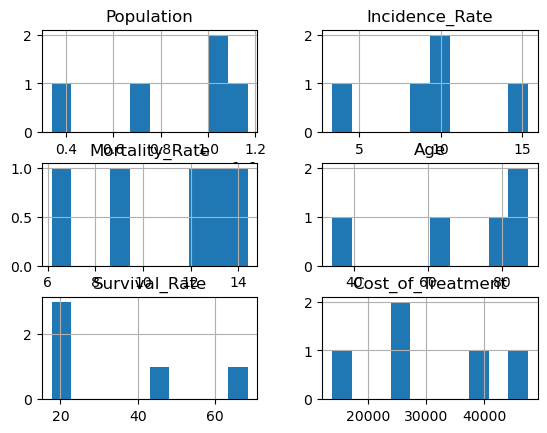

In [9]:
plt.figure(figsize=(20,20))
data.head().hist()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  160292 non-null  object 
 1   Region                   160292 non-null  object 
 2   Population               160292 non-null  int64  
 3   Incidence_Rate           160292 non-null  float64
 4   Mortality_Rate           160292 non-null  float64
 5   Gender                   160292 non-null  object 
 6   Age                      160292 non-null  int64  
 7   Alcohol_Consumption      160292 non-null  object 
 8   Smoking_Status           160292 non-null  object 
 9   Hepatitis_B_Status       160292 non-null  object 
 10  Hepatitis_C_Status       160292 non-null  object 
 11  Obesity                  160292 non-null  object 
 12  Diabetes                 160292 non-null  object 
 13  Rural_or_Urban           160292 non-null  object 
 14  Seaf

In [12]:
data['Country'].value_counts()

Country
Italy             5473
Egypt             5449
DR Congo          5448
France            5442
Kenya             5393
Myanmar           5388
Bangladesh        5388
Brazil            5385
Japan             5380
Spain             5361
Pakistan          5360
South Africa      5359
Iran              5353
Turkey            5342
Indonesia         5342
United States     5341
Tanzania          5336
Mexico            5329
Philippines       5316
South Korea       5316
Nigeria           5315
Thailand          5307
Ethiopia          5307
Germany           5304
India             5287
Russia            5282
China             5261
Vietnam           5260
Colombia          5259
United Kingdom    5209
Name: count, dtype: int64

In [16]:
data.isnull().sum()

Country                    0
Region                     0
Population                 0
Incidence_Rate             0
Mortality_Rate             0
Gender                     0
Age                        0
Alcohol_Consumption        0
Smoking_Status             0
Hepatitis_B_Status         0
Hepatitis_C_Status         0
Obesity                    0
Diabetes                   0
Rural_or_Urban             0
Seafood_Consumption        0
Herbal_Medicine_Use        0
Healthcare_Access          0
Screening_Availability     0
Treatment_Availability     0
Liver_Transplant_Access    0
Ethnicity                  0
Preventive_Care            0
Survival_Rate              0
Cost_of_Treatment          0
Prediction                 0
dtype: int64

In [14]:
data.value_counts()

Country      Region          Population  Incidence_Rate  Mortality_Rate  Gender  Age  Alcohol_Consumption  Smoking_Status  Hepatitis_B_Status  Hepatitis_C_Status  Obesity      Diabetes  Rural_or_Urban  Seafood_Consumption  Herbal_Medicine_Use  Healthcare_Access  Screening_Availability  Treatment_Availability  Liver_Transplant_Access  Ethnicity  Preventive_Care  Survival_Rate  Cost_of_Treatment  Prediction
Bangladesh   South Asia      1012010     9.801892        28.100856       Male    24   Moderate             Smoker          Negative            Negative            Underweight  No        Rural           Medium               Yes                  Moderate           Available               Available               No                       Asian      Moderate         81.820695      16091.619562       No            1
Philippines  Southeast Asia  1414373200  13.724522       22.854126       Male    20   High                 Non-Smoker      Negative            Negative            Underweight  N

In [17]:
data.isna().sum()

Country                    0
Region                     0
Population                 0
Incidence_Rate             0
Mortality_Rate             0
Gender                     0
Age                        0
Alcohol_Consumption        0
Smoking_Status             0
Hepatitis_B_Status         0
Hepatitis_C_Status         0
Obesity                    0
Diabetes                   0
Rural_or_Urban             0
Seafood_Consumption        0
Herbal_Medicine_Use        0
Healthcare_Access          0
Screening_Availability     0
Treatment_Availability     0
Liver_Transplant_Access    0
Ethnicity                  0
Preventive_Care            0
Survival_Rate              0
Cost_of_Treatment          0
Prediction                 0
dtype: int64

Text(0.5, 1.0, 'Age')

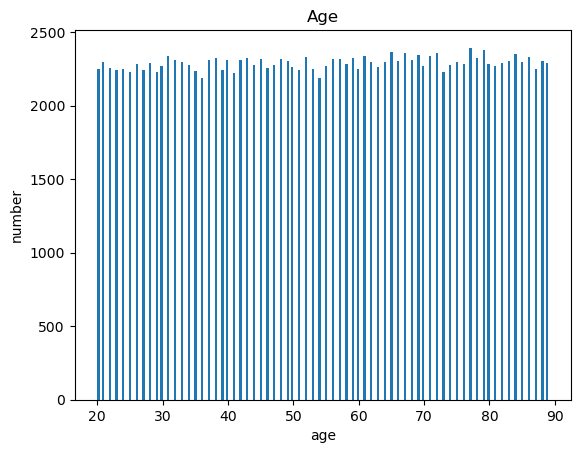

In [35]:
plt.hist(data['Age'],bins=200)
plt.xlabel('age')
plt.ylabel('number')
plt.title("Age")

In [15]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [16]:
X=pd.get_dummies(X)

In [20]:
y.head()

0    Yes
1     No
2     No
3     No
4     No
Name: Prediction, dtype: object

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 87 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Population                            160292 non-null  int64  
 1   Incidence_Rate                        160292 non-null  float64
 2   Mortality_Rate                        160292 non-null  float64
 3   Age                                   160292 non-null  int64  
 4   Survival_Rate                         160292 non-null  float64
 5   Cost_of_Treatment                     160292 non-null  float64
 6   Country_Bangladesh                    160292 non-null  bool   
 7   Country_Brazil                        160292 non-null  bool   
 8   Country_China                         160292 non-null  bool   
 9   Country_Colombia                      160292 non-null  bool   
 10  Country_DR Congo                      160292 non-null  bool   
 11  

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((128233, 87), (32059, 87), (128233,), (32059,))

Training score:  0.7564979373484204
Testing score:  0.7442527839296298
Confusion Matrix:
 [[23740   340]
 [ 7859   120]]
Classification Report:
               precision    recall  f1-score   support

          No       0.75      0.99      0.85     24080
         Yes       0.26      0.02      0.03      7979

    accuracy                           0.74     32059
   macro avg       0.51      0.50      0.44     32059
weighted avg       0.63      0.74      0.65     32059

Accuracy Score:  0.7442527839296298


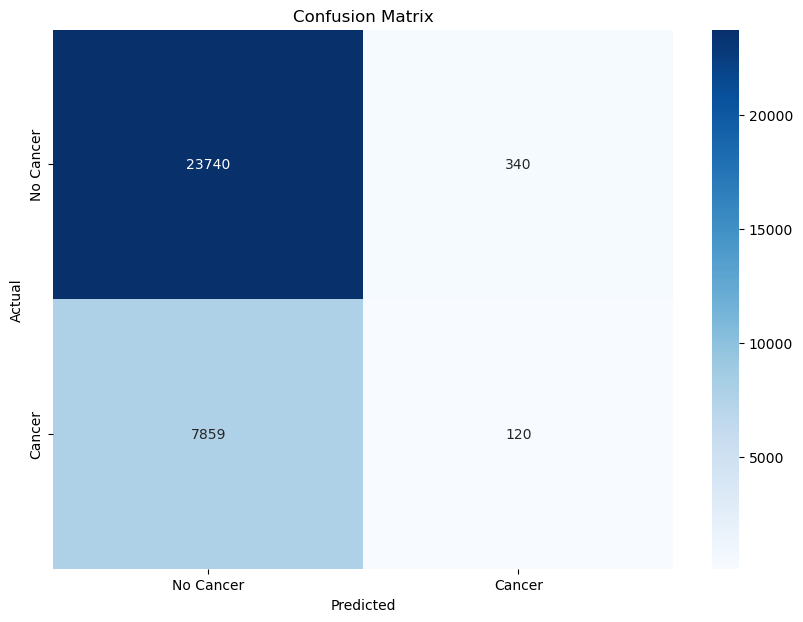

In [28]:
from sklearn.preprocessing import Normalizer
steps=[
    ('normalizer',Normalizer()),
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=0.95)),
    ('classifier',MLPClassifier())
]
pipeline=Pipeline(steps)
pipeline.fit(X_train,y_train)   
print("Training score: ",pipeline.score(X_train,y_train))
print("Testing score: ",pipeline.score(X_test,y_test))
y_pred=pipeline.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
# Visualizing the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training score with PCA:  0.7601085524007081
Testing score with PCA:  0.7498050469446957
Confusion Matrix with PCA:
 [[24019    61]
 [ 7960    19]]
Classification Report with PCA:
               precision    recall  f1-score   support

          No       0.75      1.00      0.86     24080
         Yes       0.24      0.00      0.00      7979

    accuracy                           0.75     32059
   macro avg       0.49      0.50      0.43     32059
weighted avg       0.62      0.75      0.64     32059



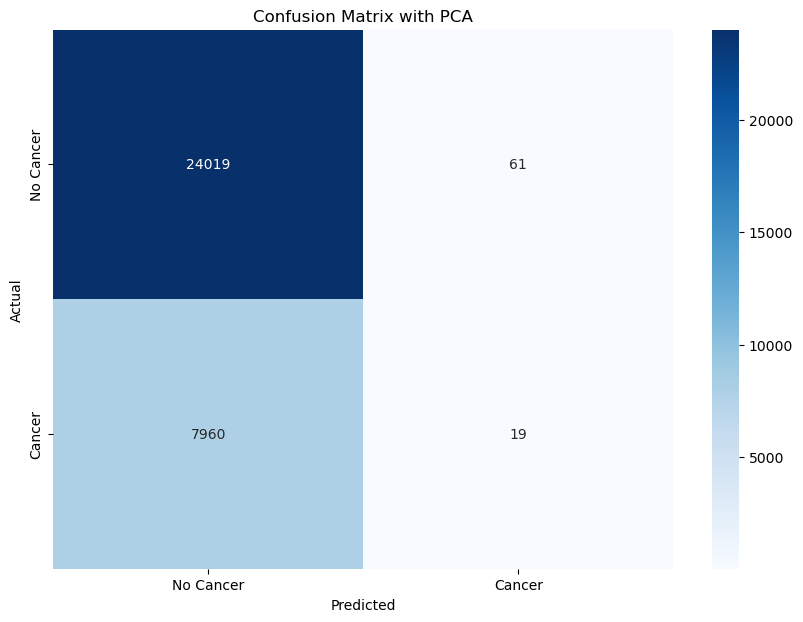

In [22]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=10)),
         ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)  
print("Training score with PCA: ", pipeline.score(X_train, y_train))
print("Testing score with PCA: ", pipeline.score(X_test, y_test))
y_pred = pipeline.predict(X_test)
print("Confusion Matrix with PCA:\n", confusion_matrix(y_test, y_pred))
print("Classification Report with PCA:\n", classification_report(y_test, y_pred))
# Visualizing the confusion matrix with PCA
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix with PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



KNN Training score:  0.6986033236374413
KNN Testing score:  0.697651205589694
KNN Confusion Matrix:
 [[21550  2530]
 [ 7163   816]]
KNN Classification Report:
               precision    recall  f1-score   support

          No       0.75      0.89      0.82     24080
         Yes       0.24      0.10      0.14      7979

    accuracy                           0.70     32059
   macro avg       0.50      0.50      0.48     32059
weighted avg       0.62      0.70      0.65     32059



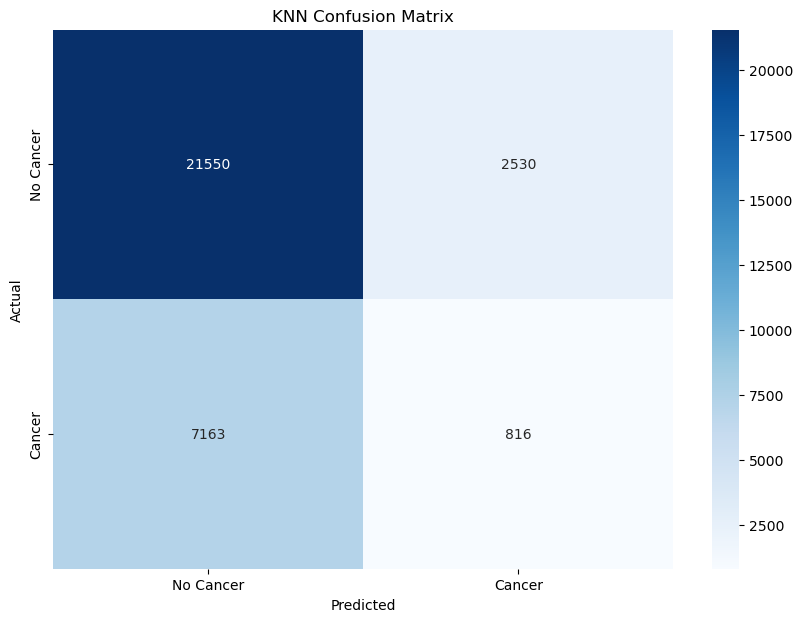

In [23]:
# Using KNeighborsClassifier
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier())
])
knn_pipeline.fit(X_train, y_train)
print("KNN Training score: ", knn_pipeline.score(X_train, y_train))
print("KNN Testing score: ", knn_pipeline.score(X_test, y_test))
y_pred_knn = knn_pipeline.predict(X_test)
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
# Visualizing the KNN confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#using Logistic Regression
#make polynomial features
from sklearn.preprocessing import PolynomialFeatures
logistic_pipeline = Pipeline([('polynomial_features', PolynomialFeatures(degree=2)),
    ('logistic', LogisticRegression())
])
logistic_pipeline.fit(X_train, y_train)
print("Logistic Regression Training score: ", logistic_pipeline.score(X_train, y_train))
print("Logistic Regression Testing score: ", logistic_pipeline.score(X_test, y_test))
y_pred_logistic = logistic_pipeline.predict(X_test)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
# Visualizing the Logistic Regression confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Training score:  0.6223281058697839
Decision Tree Testing score:  0.6202314482672573
Decision Tree Confusion Matrix:
 [[17870  6210]
 [ 5965  2014]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

          No       0.75      0.74      0.75     24080
         Yes       0.24      0.25      0.25      7979

    accuracy                           0.62     32059
   macro avg       0.50      0.50      0.50     32059
weighted avg       0.62      0.62      0.62     32059



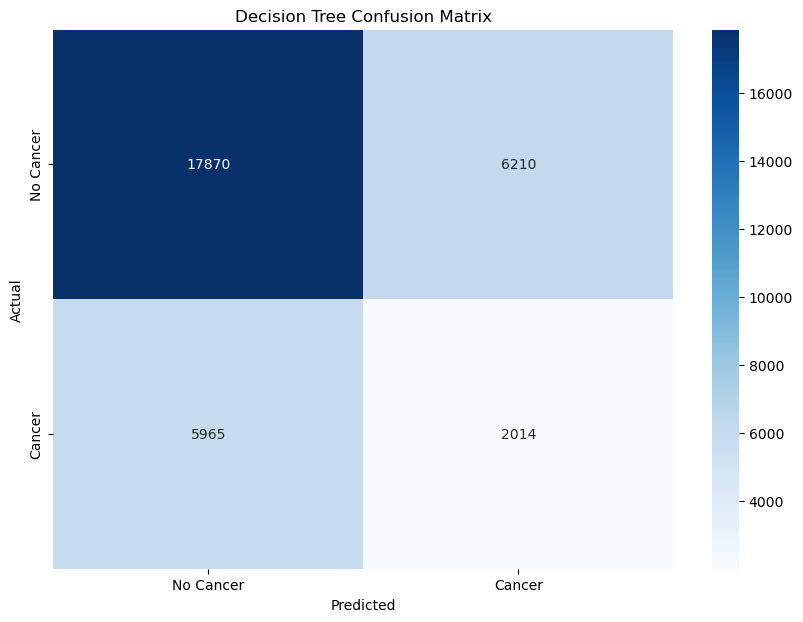

In [25]:
from email.headerregistry import UniqueSingleAddressHeader


UniqueSingleAddressHeader# Using Decision Tree Classifier
decision_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('decision_tree', DecisionTreeClassifier())
])
decision_tree_pipeline.fit(X_train, y_train)
print("Decision Tree Training score: ", decision_tree_pipeline.score(X_train, y_train))
print("Decision Tree Testing score: ", decision_tree_pipeline.score(X_test, y_test))
y_pred_decision_tree = decision_tree_pipeline.predict(X_test)
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_decision_tree))
# Visualizing the Decision Tree confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_decision_tree), annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Training score:  0.6221019550349755
Decision Tree Testing score:  0.6197011759568296
Decision Tree Confusion Matrix:
 [[17825  6255]
 [ 5937  2042]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

          No       0.75      0.74      0.75     24080
         Yes       0.25      0.26      0.25      7979

    accuracy                           0.62     32059
   macro avg       0.50      0.50      0.50     32059
weighted avg       0.62      0.62      0.62     32059



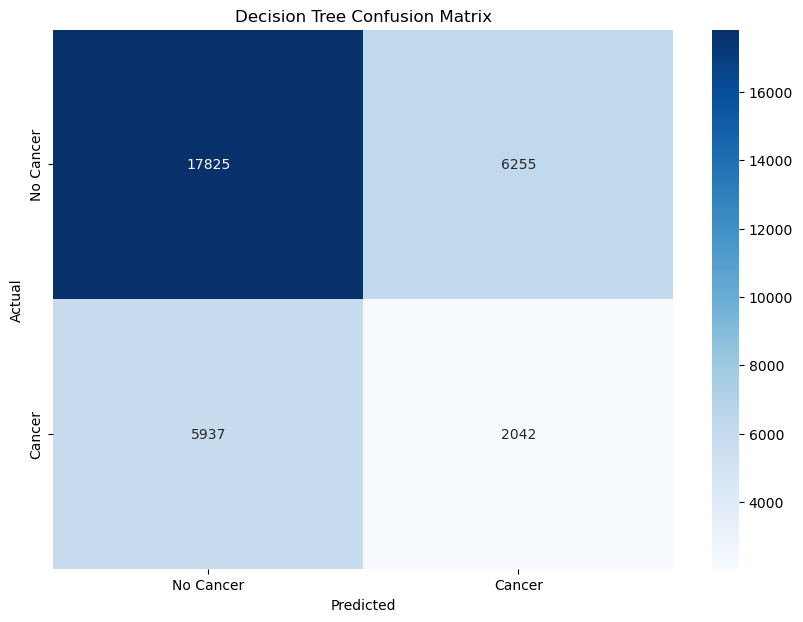

In [26]:
# Using suport victor Classifier
from sklearn.svm import SVC
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svc', SVC())
])
decision_tree_pipeline.fit(X_train, y_train)
print("Decision Tree Training score: ", decision_tree_pipeline.score(X_train, y_train))
print("Decision Tree Testing score: ", decision_tree_pipeline.score(X_test, y_test))
y_pred_decision_tree = decision_tree_pipeline.predict(X_test)
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_decision_tree))
# Visualizing the Decision Tree confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_decision_tree), annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()